In [1]:
import os
import folium

print(folium.__version__)

0.3.0+91.g38f566b.dirty


## ColorLine

In [2]:
import numpy as np

x = np.linspace(0, 2*np.pi, 300)

lats = 20 * np.cos(x)
lons = 20 * np.sin(x)
colors = np.sin(5 * x)

In [3]:
# FIXME: This example is broken!!!

from folium import features

m = folium.Map([0, 0], zoom_start=3)

color_line = features.ColorLine(
    list(zip(lats, lons)),
    colors=colors,
    colormap=['y', 'orange', 'r'],
    weight=10)

color_line.add_to(m)

m.save(os.path.join('results', 'Features_0.html'))

m

#### PNG representation

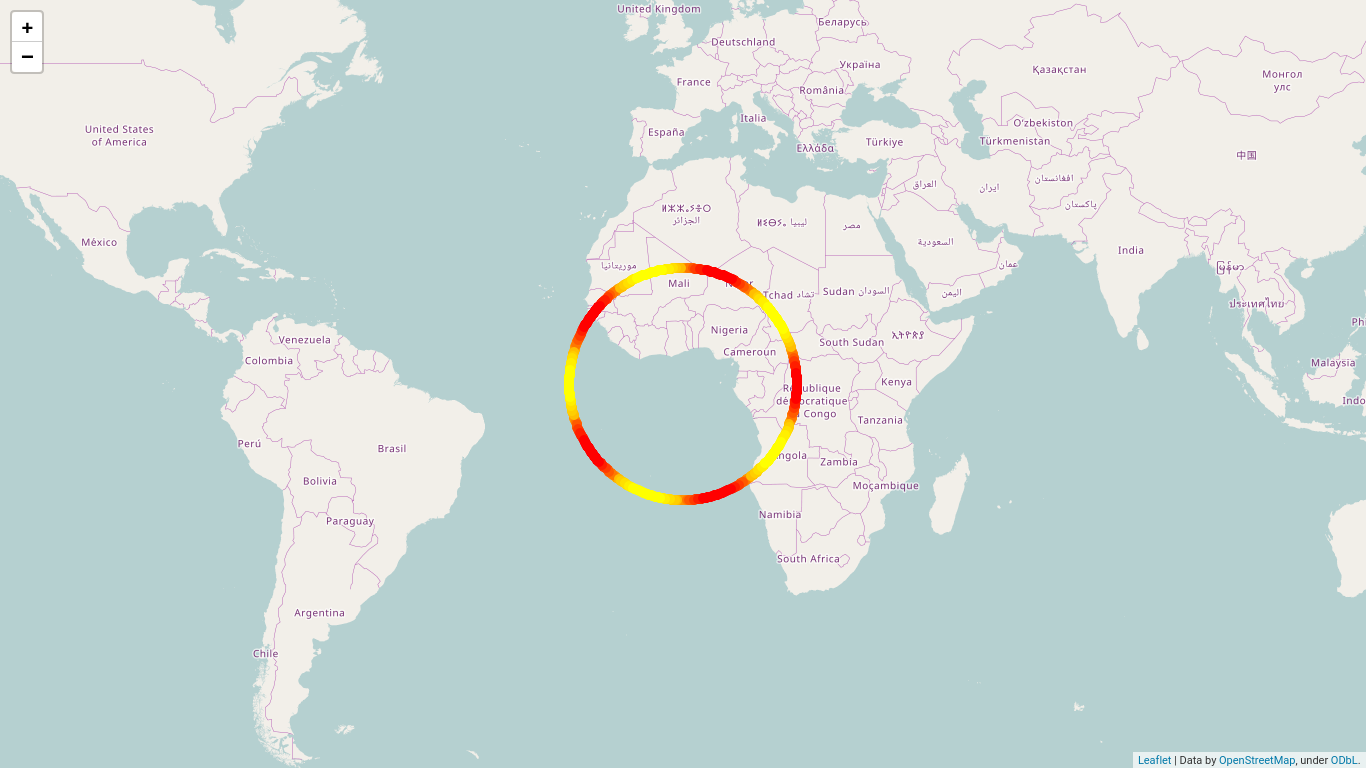

In [4]:
from IPython.display import Image

Image(m._to_png())

### WMS

In [5]:
m = folium.Map([40, -100], zoom_start=4)

w = features.WmsTileLayer(
    "http://mesonet.agron.iastate.edu/cgi-bin/wms/nexrad/n0r.cgi",
    name='test',
    fmt='image/png',
    layers='nexrad-n0r-900913',
    attr=u"Weather data © 2012 IEM Nexrad",
    transparent=True
)

w.add_to(m)

m.save(os.path.join('results', 'Features_1.html'))

m

### Marker, Icon, Popup

In [4]:
import branca


f = branca.element.Figure(figsize=(8, 8))
m = folium.Map([0, 0], zoom_start=1)
mk = features.Marker([0, 0])
pp = features.Popup('hello')
ic = features.Icon(color='red')

f.add_child(m)
mk.add_child(ic)
mk.add_child(pp)
m.add_child(mk)

f.save(os.path.join('results', 'Features_2.html'))

f

### RegularPolygonMarker

In [7]:
f = branca.element.Figure()
m = folium.Map([0, 0], zoom_start=1)
mk = features.RegularPolygonMarker([0, 0])
mk2 = features.RegularPolygonMarker([0, 45])

f.add_child(m)
m.add_child(mk)
m.add_child(mk2)

f.save(os.path.join('results', 'Features_3.html'))

f

### Vega popup

In [5]:
# FIXME: This example is broken!!!

import json
import vincent

N = 100

multi_iter2 = {
    'x': np.random.uniform(size=(N,)),
    'y': np.random.uniform(size=(N,)),
}

scatter = vincent.Scatter(multi_iter2, iter_idx='x', height=100, width=200)
data = json.loads(scatter.to_json())

f = branca.element.Figure()
m = folium.Map([0, 0], zoom_start=1)
mk = features.Marker([0, 0])
p = features.Popup('Hello')
v = features.Vega(data, width='100%', height='100%')

f.add_child(m)
mk.add_child(p)
p.add_child(v)
m.add_child(mk)

f.save(os.path.join('results', 'Features_4.html'))

f

### Vega-Lite popup

In [8]:
import pandas as pd
from altair import Chart

N = 100

multi_iter2 = pd.DataFrame({
    'x': np.random.uniform(size=(N,)),
    'y': np.random.uniform(size=(N,)),
})

scatter = Chart(multi_iter2).mark_circle().encode(x="x", y="y")
scatter.width = 200
scatter.height = 100
data = json.loads(scatter.to_json())

f = branca.element.Figure()
m = folium.Map([0, 0], zoom_start=1)
mk = features.Marker([0, 0])
p = features.Popup('Hello')
v = features.VegaLite(data, width='100%', height='100%')

f.add_child(m)
mk.add_child(p)
p.add_child(v)
m.add_child(mk)

f.save(os.path.join('results', 'Features_4b.html'))

f

### Vega div

In [7]:
N = 100

multi_iter2 = {
    'x': np.random.uniform(size=(N,)),
    'y': np.random.uniform(size=(N,)),
}

scatter = vincent.Scatter(multi_iter2, iter_idx='x', height=400, width=600)
data = json.loads(scatter.to_json())

f = branca.element.Figure()
v = features.Vega(data, height=40, width=600)
f.add_child(v)

f.save(os.path.join('results', 'Features_5.html'))

f

### Vega div and a Map


In [9]:
N = 100

multi_iter2 = {
    'x': np.random.uniform(size=(N,)),
    'y': np.random.uniform(size=(N,)),
}

scatter = vincent.Scatter(multi_iter2, iter_idx='x', height=250, width=420)
data = json.loads(scatter.to_json())

f = branca.element.Figure()

# Create two maps.
m = folium.Map(location=[0, 0],
               tiles='stamenwatercolor',
               zoom_start=1,
               position='absolute',
               left='0%',
               width='50%',
               height='50%')

m2 = folium.Map(location=[46, 3],
                tiles='OpenStreetMap',
                zoom_start=4,
                position='absolute',
                left='50%',
                width='50%',
                height='50%',
                top='50%')

# Create two Vega.
v = features.Vega(data, position='absolute', left='50%', width='50%', height='50%')

v2 = features.Vega(data, position='absolute', left='0%', width='50%', height='50%', top='50%')

f.add_child(m)
f.add_child(m2)
f.add_child(v)
f.add_child(v2)

f.save(os.path.join('results', 'Features_6.html'))

f

### Vega-Lite div and a Map

In [10]:
N = 100

multi_iter2 = pd.DataFrame({
    'x': np.random.uniform(size=(N,)),
    'y': np.random.uniform(size=(N,)),
})

scatter = Chart(multi_iter2).mark_circle().encode(x="x", y="y")
scatter.width = 420
scatter.height = 250
data = json.loads(scatter.to_json())

f = branca.element.Figure()

# Create two maps.
m = folium.Map(location=[0, 0],
               tiles='stamenwatercolor',
               zoom_start=1,
               position='absolute',
               left='0%',
               width='50%',
               height='50%')

m2 = folium.Map(location=[46, 3],
                tiles='OpenStreetMap',
                zoom_start=4,
                position='absolute',
                left='50%',
                width='50%',
                height='50%',
                top='50%')

# Create two Vega.
v = features.VegaLite(data, position='absolute', left='50%', width='50%', height='50%')

v2 = features.VegaLite(data, position='absolute', left='0%', width='50%', height='50%', top='50%')

f.add_child(m)
f.add_child(m2)
f.add_child(v)
f.add_child(v2)

f.save(os.path.join('results', 'Features_6b.html'))

f

### GeoJson

In [11]:
N = 1000

lons = +5 - np.random.normal(size=N)
lats = 48 - np.random.normal(size=N)

data = {
    "type": "FeatureCollection",
    "features": [
        {
            "type": "Feature",
            "geometry": {
                "type": "MultiPoint",
                "coordinates": [[lon, lat] for (lat, lon) in zip(lats, lons)],
            },
            "properties": {"prop0": "value0"}
        },
    ],
}

m = folium.Map([48, 5], zoom_start=6)
m.add_child(features.GeoJson(data))

m.save(os.path.join('results', 'Features_7.html'))

m

### Marker Cluster

In [12]:
N = 100

data = np.array(
    [
        np.random.uniform(low=35, high=60, size=N),  # Random latitudes in Europe.
        np.random.uniform(low=-12, high=30, size=N),  # Random longitudes in Europe.
        range(N),  # Popups text will be simple numbers .
    ]
).T

m = folium.Map([45, 3], zoom_start=4)
mc = features.MarkerCluster()

for k in range(N):
    mk = features.Marker([data[k][0], data[k][1]])
    p = features.Popup(str(data[k][2]))
    mk.add_child(p)
    mc.add_child(mk)

m.add_child(mc)

m.save(os.path.join('results', 'Features_8.html'))

m

### Div

In [13]:
N = 100

multi_iter2 = {
    'x': np.random.uniform(size=(N,)),
    'y': np.random.uniform(size=(N,)),
}

scatter = vincent.Scatter(multi_iter2, iter_idx='x', height=250, width=420)
data = json.loads(scatter.to_json())

f = branca.element.Figure()

d1 = f.add_subplot(1, 2, 1)
d2 = f.add_subplot(1, 2, 2)

d1.add_child(folium.Map([0, 0], tiles='stamenwatercolor', zoom_start=1))
d2.add_child(folium.Map([46, 3], tiles='OpenStreetMap', zoom_start=5))

f.save(os.path.join('results', 'Features_9.html'))

f

### LayerControl

In [14]:
m = folium.Map(tiles=None)

folium.TileLayer('OpenStreetMap').add_to(m)
folium.TileLayer('stamentoner').add_to(m)

folium.LayerControl().add_to(m)

m.save(os.path.join('results', 'Features_10.html'))

m

## Line example

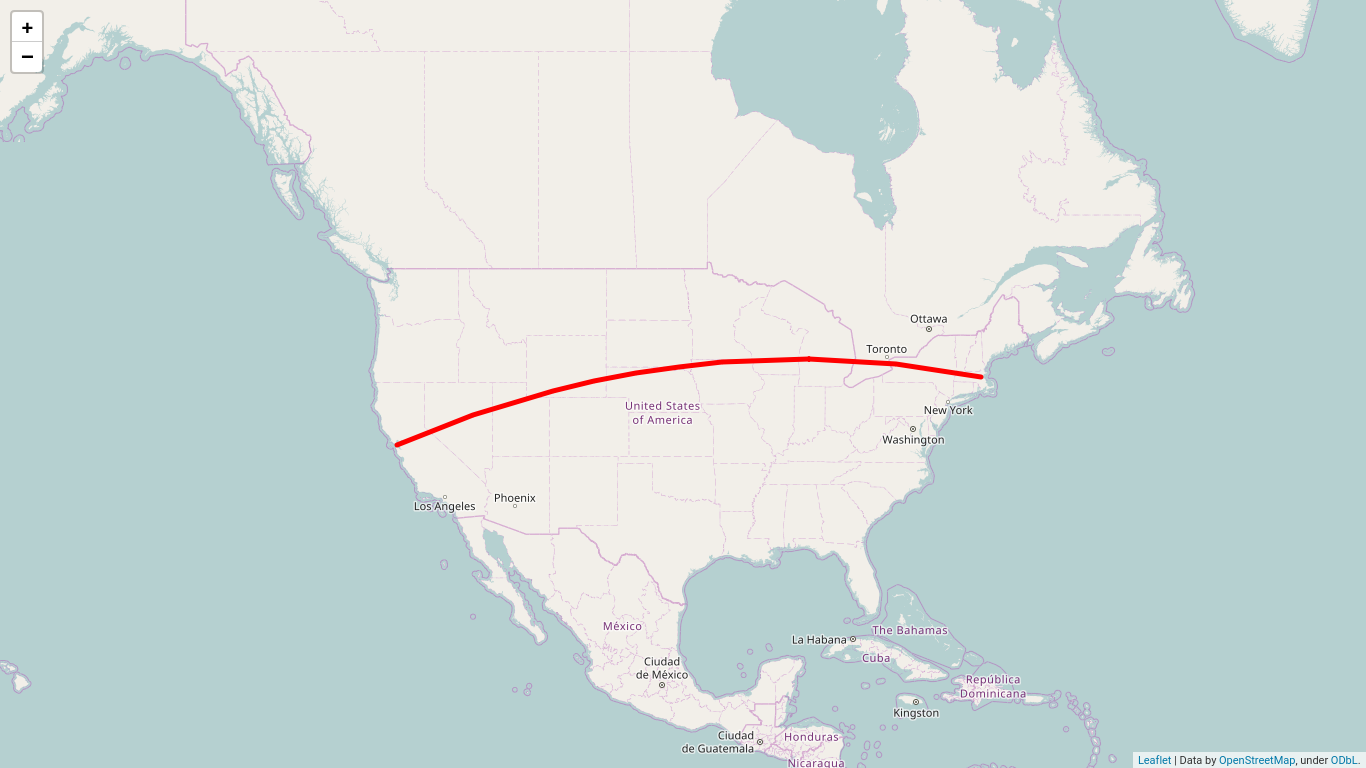

In [15]:
# Coordinates are 15 points on the great circle from Boston to
# San Francisco.
# Reference: http://williams.best.vwh.net/avform.htm#Intermediate
coordinates = [
    [42.3581, -71.0636],
    [42.82995815, -74.78991444],
    [43.17929819, -78.56603306],
    [43.40320216, -82.37774519],
    [43.49975489, -86.20965845],
    [43.46811941, -90.04569087],
    [43.30857071, -93.86961818],
    [43.02248456, -97.66563267],
    [42.61228259, -101.41886832],
    [42.08133868, -105.11585198],
    [41.4338549, -108.74485069],
    [40.67471747, -112.29609954],
    [39.8093434, -115.76190821],
    [38.84352776, -119.13665678],
    [37.7833, -122.4167]]


# Create the map and add the line
m = folium.Map(location=[41.9, -97.3], zoom_start=4, png_enabled=True)
folium.PolyLine(coordinates, color='#FF0000', weight=5).add_to(m)

m.save(os.path.join('results', 'Features_11.html'))

m